# Analise Exploratoria parte 1


Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot') # Fazendo o ggplot ser o estilo padrao de todos os plots

In [2]:
insurance = pd.read_csv('DataSets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


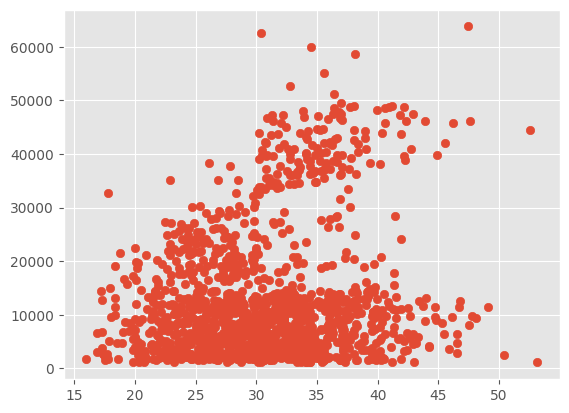

In [3]:
plt.scatter(data=insurance, x='bmi', y='charges')
plt.show()

Podemos analisar ver uma baixa correlação entre as variaveis

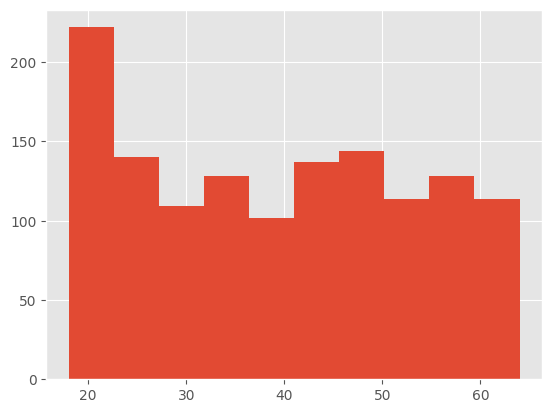

In [4]:
plt.hist(data=insurance, x='age')
plt.show()

## Coloração e spines

Temos uma concentração de jovens nesse dataset

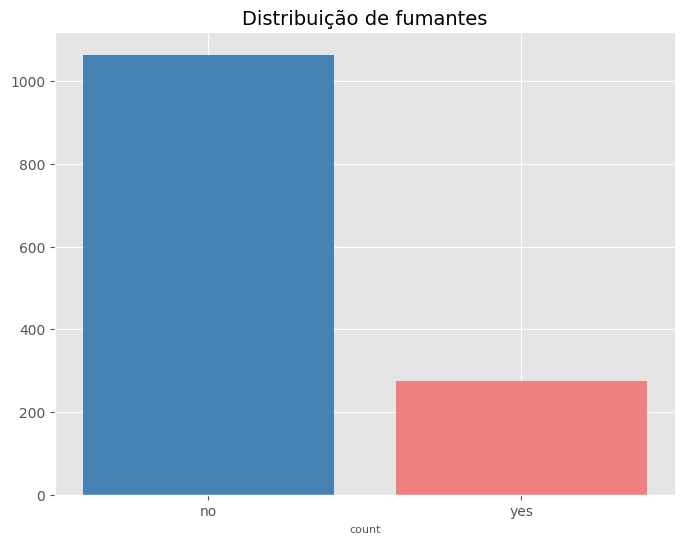

In [5]:
# # Criando uma contagem para fazer o barplot da contagem de fumantes
# smoke_counts = insurance['smoker'].value_counts()

# plt.figure(figsize=(8, 6))

# plt.bar(
#     smoke_counts.index, # Eixo X
#     smoke_counts.values, # Eixo Y
#     color = ['steelblue', 'lightcoral']
# )

# plt.xlabel('Smoker', fontsize=8)
# plt.ylabel('count', fontsize=8)

# # Removendo as os contornos da parte superior e da lateral direita
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# plt.title('Distribuição de fumantes')

# plt.show()

# Mesmo gráfico usando subplot
smoke_counts = insurance['smoker'].value_counts()
colors = ['steelblue', 'lightcoral']

fig, ax = plt.subplots(figsize=(8,6)) # Fig -> Objeto da FIGURA(area em branco que os graficos são desenhados)/ AX -> Objeto do EIXO(espaço ocupado por um grafico especifico)
ax.bar(smoke_counts.index, smoke_counts.values, color=colors)

ax.set_xlabel('Smoke', fontsize = 8)
ax.set_xlabel('count', fontsize=8)
ax.set_title('Distribuição de fumantes', fontsize=14)

# Removendo contornos desnecessarios
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Vendo a distribuição entre as idades e as contas de saude


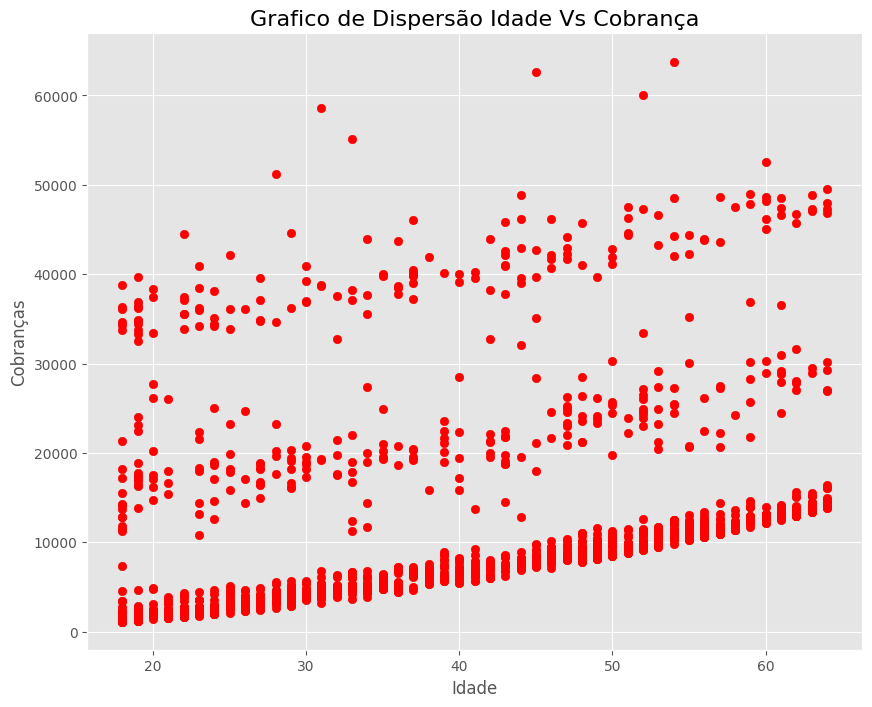

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(insurance['age'], insurance['charges'], c='red')

ax.set_title('Grafico de Dispersão Idade Vs Cobrança', fontsize=16)
ax.set_xlabel('Idade', fontsize=12)
ax.set_ylabel('Cobranças', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Subplots

Aparente há uma relação, mesmo que pequena, entre idade e cobrança, visto que aparentemente temos 3 retas ascendentes

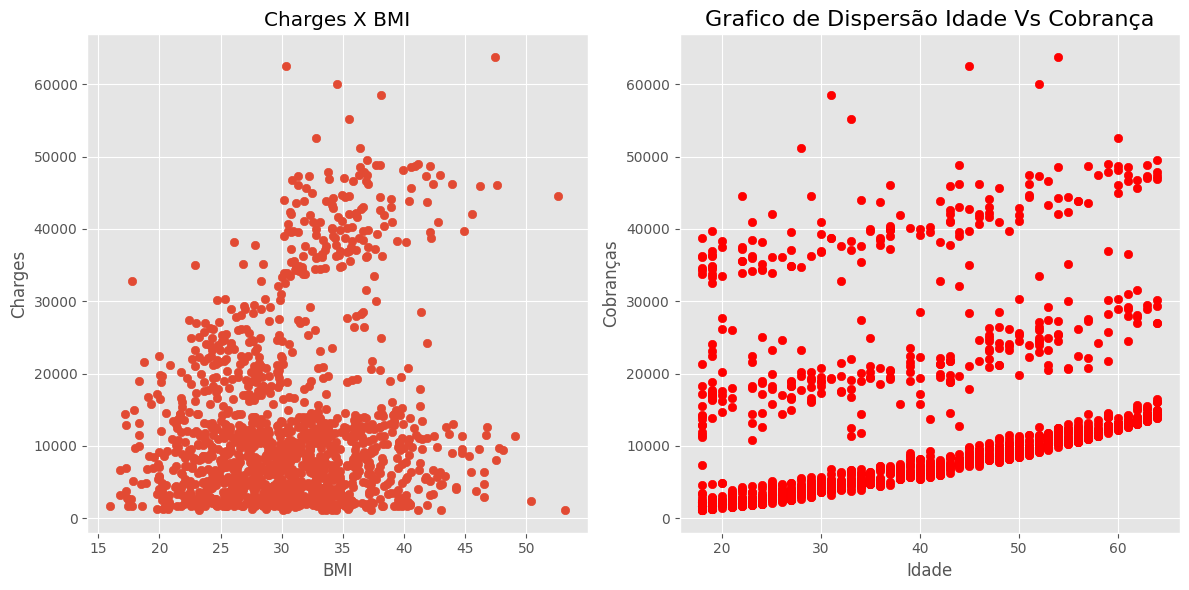

In [7]:
fig, axes = plt.subplots(
    1, # Linhas 
    2, # Colunas
    figsize=(12, 6)
)

# Plotando o primeiro gafico, sendo ele de dispersão comparando o BMI X charges
axes[0].scatter(insurance['bmi'], insurance['charges'])
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('Charges X BMI')

# Plotando o segundo grafico que compara age com charges
axes[1].scatter(insurance['age'], insurance['charges'], c='red')
axes[1].set_title('Grafico de Dispersão Idade Vs Cobrança', fontsize=16)
axes[1].set_xlabel('Idade', fontsize=12)
axes[1].set_ylabel('Cobranças', fontsize=12)

plt.tight_layout() # Ajustando espaços entre os plots

plt.show()

Fazendo o comparativo entre a media de CHARGES para as CATEGORIAS de algumas VARIAVEIS

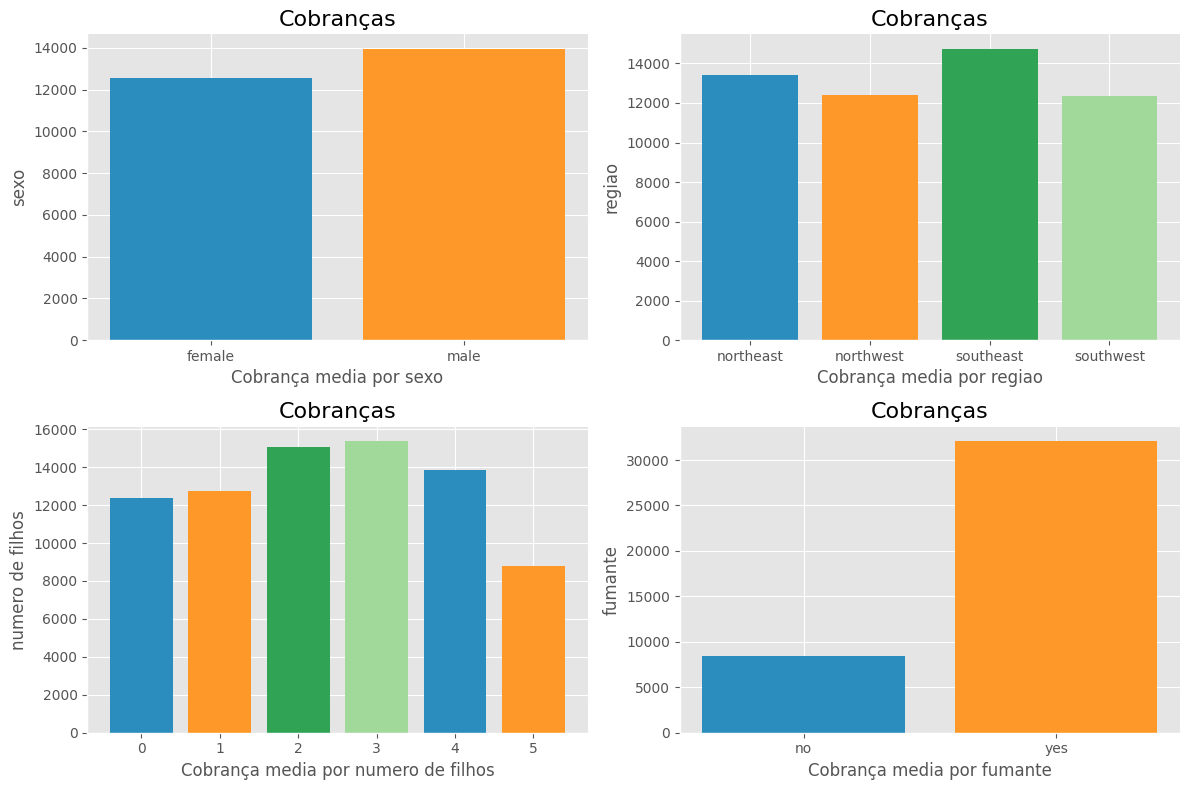

In [8]:
# Para calcular as medias de cobranças para categorias das variaveis, usaremos groupby
# Sex
charges_per_sex = insurance.groupby('sex')['charges'].mean()
# Region
charges_per_region = insurance.groupby('region')['charges'].mean()
# children
charges_per_children = insurance.groupby('children')['charges'].mean()
# Smoker
charges_per_smoker = insurance.groupby('smoker')['charges'].mean()

colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

fig, axes = plt.subplots(2,2, figsize=(12, 8))

# FUnção para plotar o barplot pra evitar repetição de codigo
def barplot(linha, coluna, x_value, y_value, x_description, y_description, title):
    axes[linha,coluna].bar(x_value, y_value, color=colors)
    axes[linha,coluna].set_title(title, fontsize=16)
    axes[linha,coluna].set_xlabel(x_description, fontsize=12)
    axes[linha,coluna].set_ylabel(y_description, fontsize=12)
    axes[linha,coluna].spines['top'].set_visible(False)
    axes[linha,coluna].spines['right'].set_visible(False)   

# Barplot da media de charges para sex (linha 0 coluna 0)
barplot(0,0, charges_per_sex.index, charges_per_sex.values, 'Cobrança media por sexo', 'sexo', 'Cobranças')

# Barplot de cobrança por regiao (linha 0 coluna 1)
barplot(0,1, charges_per_region.index, charges_per_region.values, 'Cobrança media por regiao', 'regiao', 'Cobranças')

# Barplot de cobrança por numero de filhos (linha 1 coluna 0)
barplot(1,0, charges_per_children.index, charges_per_children.values, 'Cobrança media por numero de filhos', 'numero de filhos', 'Cobranças')

# Barplot de cobrança por classe de fumante (linha 1 coluna 1)
barplot(1,1, charges_per_smoker.index, charges_per_smoker.values, 'Cobrança media por fumante', 'fumante', 'Cobranças')

plt.tight_layout()

plt.show()

Fazendo countplot com as variaveis

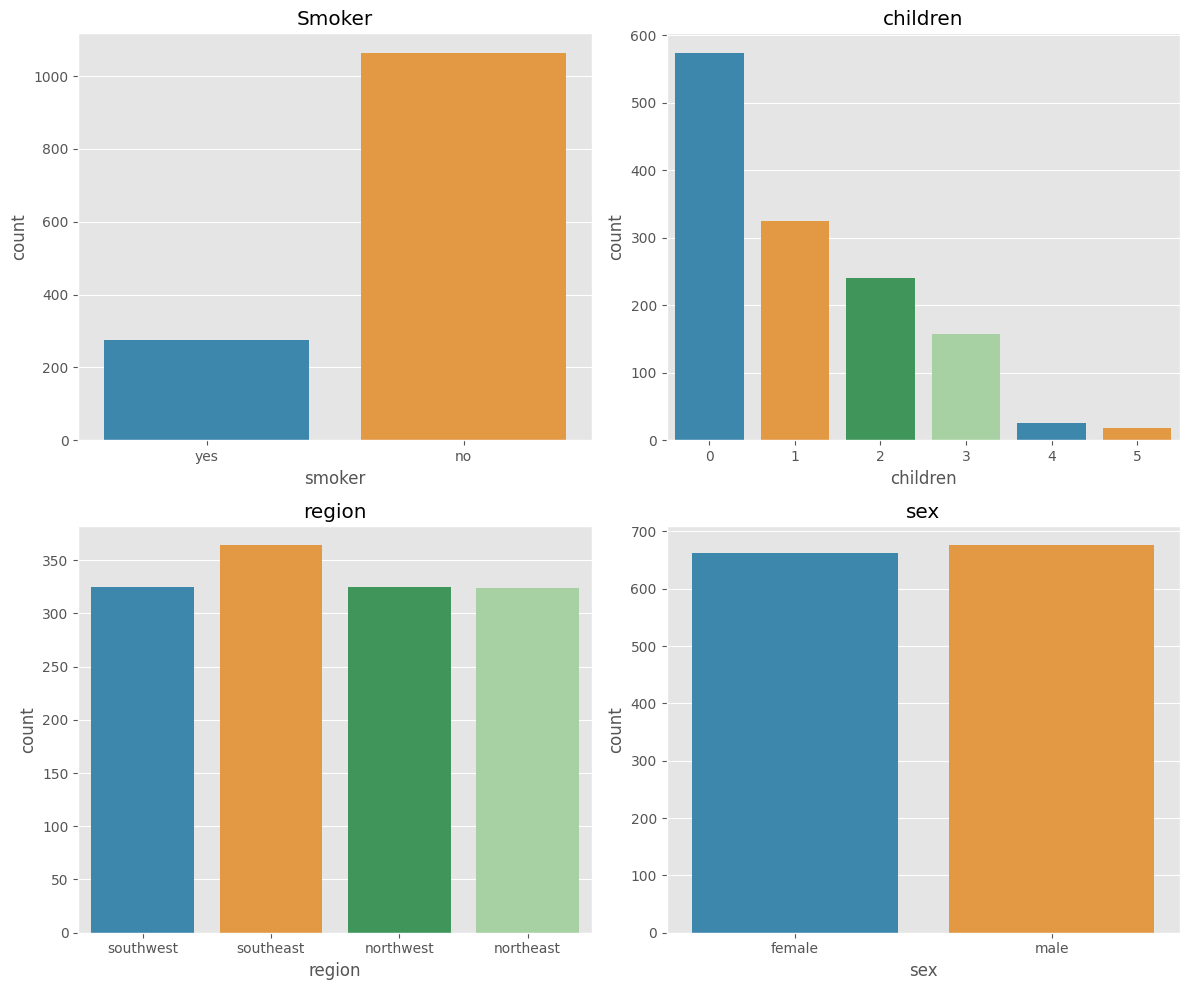

In [9]:
# Vamos usar plt para fazer os subplots e sns para plotar, para isso, temos que passar os eixos como parametro nos plot do sns
fig, ax = plt.subplots(2,2, figsize=(12, 10))
colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

# Smoker
sns.countplot(data=insurance, x='smoker', ax=ax[0,0], palette=colors)
ax[0,0].set_title('Smoker')

# Children
sns.countplot(data=insurance, x='children', ax=ax[0,1], palette=colors)
ax[0,1].set_title('children')

# Region
sns.countplot(data=insurance, x='region', ax=ax[1,0], palette=colors)
ax[1,0].set_title('region')

# Sex
sns.countplot(data=insurance, x='sex', ax=ax[1,1], palette=colors)
ax[1,1].set_title('sex')

plt.tight_layout()

plt.show()

## Adicionando textos dentro de graficos

Criando rotulos dentro dos graficos

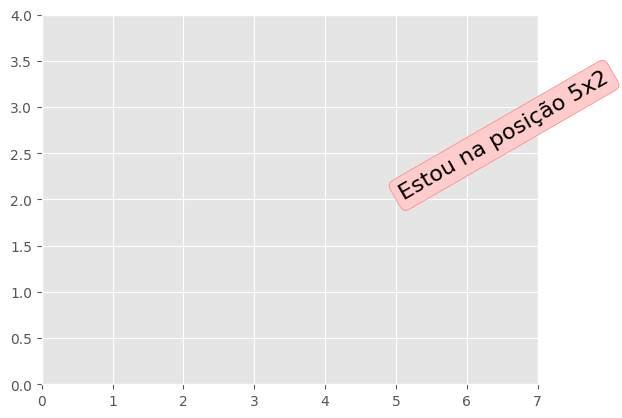

In [10]:
plt.text(5,2,'Estou na posição 5x2', rotation = 30, size=16, bbox=dict(boxstyle='round',
                                                                       ec=(1.,0.5,0.5,),
                                                                       fc=(1.,0.8,0.8)),)
# Definindo o limite dos nossos eixos
plt.xlim(0,7)
plt.ylim(0,4)

plt.show()

Colocando o text dentro do grafico do countplot das regioes

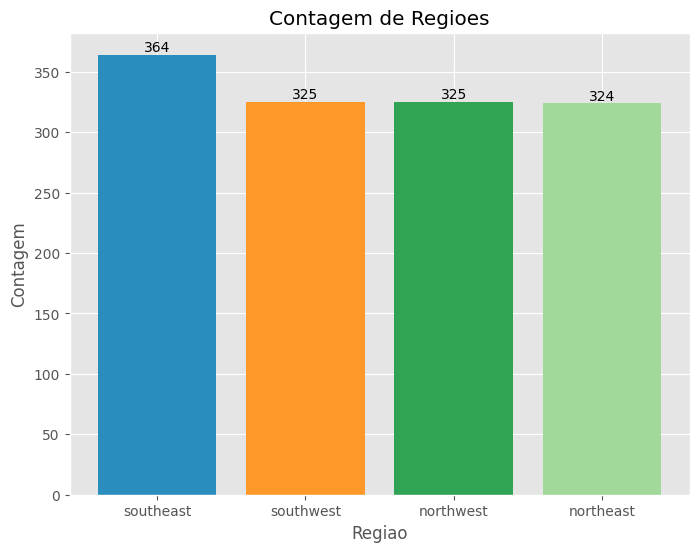

In [11]:
region_count = insurance['region'].value_counts()
colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

# Plotando o grafico
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(region_count.index, region_count.values, color=colors)
ax.set_xlabel('Regiao')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Regioes')

# Adiconando o texto: Numero escrito da quantidade pro regiao
for index, value in enumerate(region_count.values):
    # Vamos colocar na posição (index, valor) uma vez que ele vai ter que ficar horizontalmente na sua categoria, e na altura do valor, uma vez que a altura da barra é o proprio valor
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Media de cobrança por sexo

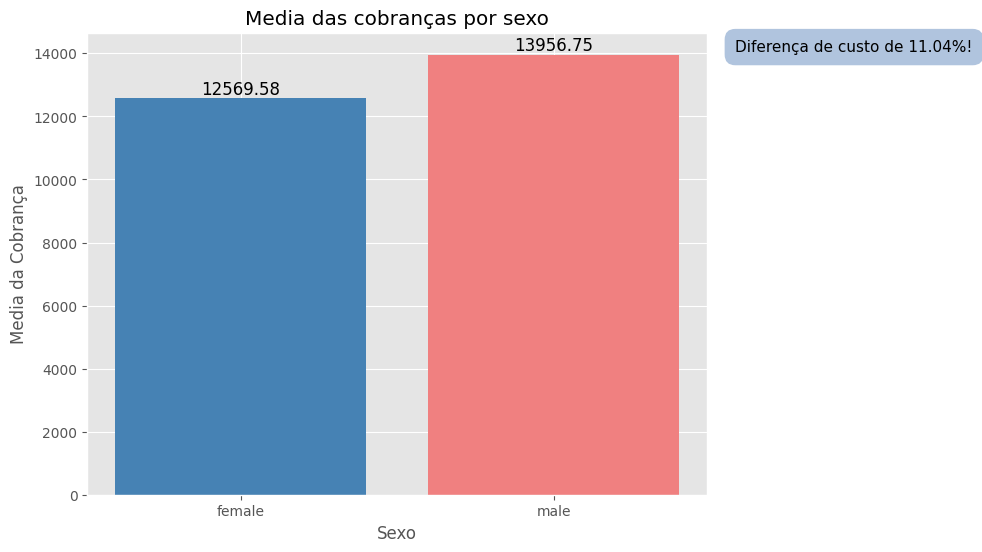

In [12]:
charges_per_sex = insurance.groupby('sex')['charges'].mean()
colors = ['steelblue', 'lightcoral']

fig, ax = plt.subplots(figsize=(8,6))

# Plorando barplot
ax.bar(charges_per_sex.index, charges_per_sex.values, color=colors)
ax.set_xlabel('Sexo')
ax.set_ylabel('Media da Cobrança')
ax.set_title('Media das cobranças por sexo')

# Colocandoo texto na posição horizontal do index e na vertical do valor, que eh o tamanho  da barra
ax.text(0, charges_per_sex.values[0], str(f'{charges_per_sex.values[0]:.2f}'),
        ha='center', va='bottom', fontsize=12)
ax.text(1, charges_per_sex.values[1], str(f'{charges_per_sex.values[1]:.2f}'),
        ha='center', va='bottom', fontsize=12)

# Colocando uma mensagem indicando qual a diferença entre a cobrança para os sexos
# Calculando quantos % a cobrança dos homens são maiores que a da mulher
diff_percent = (charges_per_sex.values[1] - charges_per_sex.values[0]) / charges_per_sex.values[0] * 100

ax.text(
    1.58, 
    charges_per_sex.values[1] + 100,
    f'Diferença de custo de {diff_percent:.2f}%!',
    bbox={
        'facecolor': 'lightsteelblue', # Cor de fundo da caixa
        'alpha': 1, # Transparencia da caixa(nesse caso é totalmente opaca)
        'pad': 0.7, # Espaçamento da caixa
        'edgecolor': 'none', # Cor da borda da caixa
        'boxstyle': 'round' # Estilo da caixa
    },
    color='black',
    fontsize=11
)
plt.show()

# Analise Exploratoria de ponta parte 2

Neste estudo, buscamos aprofundar nossa compreensão das conexões entre as características físicas de propriedades, como tamanho e número de cômodos, com seus preços e localizações. Nosso foco principal é entender os determinantes por trás dos valores imobiliários em São Paulo, uma das cidades mais dinâmicas e desafiadoras do Brasil. Utilizamos dados disponíveis no Kaggle, uma plataforma conhecida por suas competições de Machine Learning, que foram obtidos por meio de scraping no site do Quinto Andar em março de 2023.

A análise aborda as variáveis mencionadas, explorando como elas influenciam tanto os custos de aluguel quanto o preço total de uma propriedade, considerando encargos adicionais não especificados no Kaggle. Nosso objetivo é compreender, por exemplo, como a localização em um determinado bairro pode impactar o valor do aluguel. Além disso, examinaremos a importância de outras características físicas, como tamanho em metros quadrados, quantidade de banheiros e quartos, na determinação do valor total de venda ou aluguel. Identificar os bairros mais caros e mais acessíveis da cidade também está entre nossas metas.

Ressaltamos que este estudo é conduzido apenas para fins educacionais, uma vez que não temos garantias sobre possíveis vieses, lacunas ou erros no dataset, sem qualquer processo de validação. Sinta-se bem-vindo à nossa jornada exploratória pelo mercado imobiliário de São Paulo!


Link para o dataset: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices

Definição das colunas da tabela:
- Endereço: O endereço do imóvel
- Bairro: O bairro onde o imóvel está localizado
- Área: A área do imóvel em metros quadrados
- Quartos: O número de quartos no imóvel
- Garagem: O número de vagas de estacionamento disponíveis no imóvel
- Aluguel: O aluguel mensal do imóvel
- Tipo: O tipo do imóvel (apartamento, casa, etc.)
- Total: O custo total do imóvel, incluindo aluguel, impostos e outras taxas.

## Importações e carregamento do DataSet

In [13]:
# Tratamento de dados
import pandas as pd
import numpy as np 

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

# Não exisbir warnings
import warnings
warnings.filterwarnings("ignore")

# Fazendo o ggplot ser o estilo padrao de todos os plots
plt.style.use('ggplot') 

# Configurar para exibir ate 15 linhas de um DF em pandas e para mostrar todas as colunas
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)


In [14]:
housing = pd.read_csv('DataSets/data.csv')
housing.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Primeiro vamos começar fazendo algumas perguntas para explorar a base de dados: 
- Quais os bairros mais caros de São Paulo? 
- Quais os bairros com os maiores apartamentos?
- Existe correlação entre tamanho do apartamento e o seu preço? E entre o número de banheiros? E o número de vagas?
- Qual a característica de cada tipo de imóvel, em relação a preço, metragem, etc.?
- O que parece influenciar a diferença entre o aluguel e o custo total? Qual característica do imóvel?

In [15]:
print(f'O dataframe possui {housing.shape[0]} linhas e {housing.shape[1]} colunas')

O dataframe possui 11657 linhas e 8 colunas


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


Não temos nenhum campo nulo

Vamos separar as variaveis em numericas e categoricas

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericas = housing.select_dtypes(include=numerics) # Filtrando pelos tipos selecionados acima

categoricas = housing.select_dtypes(exclude=numerics)
print(f'Temos {numericas.shape[1]} colunas numericas e {categoricas.shape[1]} colunas categoricas')

Temos 5 colunas numericas e 3 colunas categoricas


Poderiamos usar outras estrategias para separar numericas e categoricas, como:
- np.number
- Separar por valores unicos, ou seja, colunas com muitos valores unicos seriam numericas e com pouco seria categoricas

## Analise Exploratória

## Analise Univariadas

Primeiramente vamos entender o perfil do público em análise e verificar possiveis anomalias

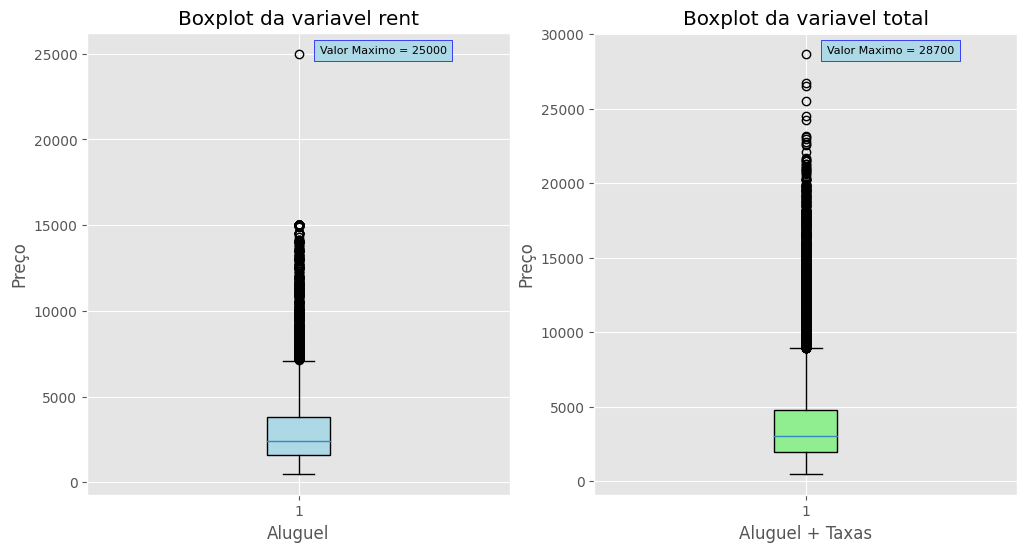

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

colors = ['steelblue', 'lightcoral']

bp1 = axes[0].boxplot(housing['rent'], patch_artist=True)
axes[0].set_title('Boxplot da variavel rent')
axes[0].set_xlabel('Aluguel')
axes[0].set_ylabel('Preço')

# Definindo a cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

# Adicionando texto no valor maximo
max_rent = np.max(housing['rent']) # É a altura do boxplot
axes[0].annotate(f'Valor Maximo = {max_rent}', # Texto
               xy=(1, max_rent), # Posição da seta
               xytext=(1.05, max_rent),# Posição do texto
               bbox=dict(facecolor='lightblue', edgecolor='blue'), # Coloração
               fontsize=8)

bp2 = axes[1].boxplot(housing['total'], patch_artist=True)
axes[1].set_title('Boxplot da variavel total')
axes[1].set_xlabel('Aluguel + Taxas')
axes[1].set_ylabel('Preço')

# Definindo a cor do boxplot
bp2['boxes'][0].set_facecolor('lightgreen')

# Adicionando texto no valor maximo
max_total = np.max(housing['total']) # É a altura do boxplot
axes[1].annotate(f'Valor Maximo = {max_total}', 
               xy=(1, max_total),
               xytext=(1.05, max_total),
               bbox=dict(facecolor='lightblue', edgecolor='blue'),
               fontsize=8)

plt.show()

Histograma do aluguel

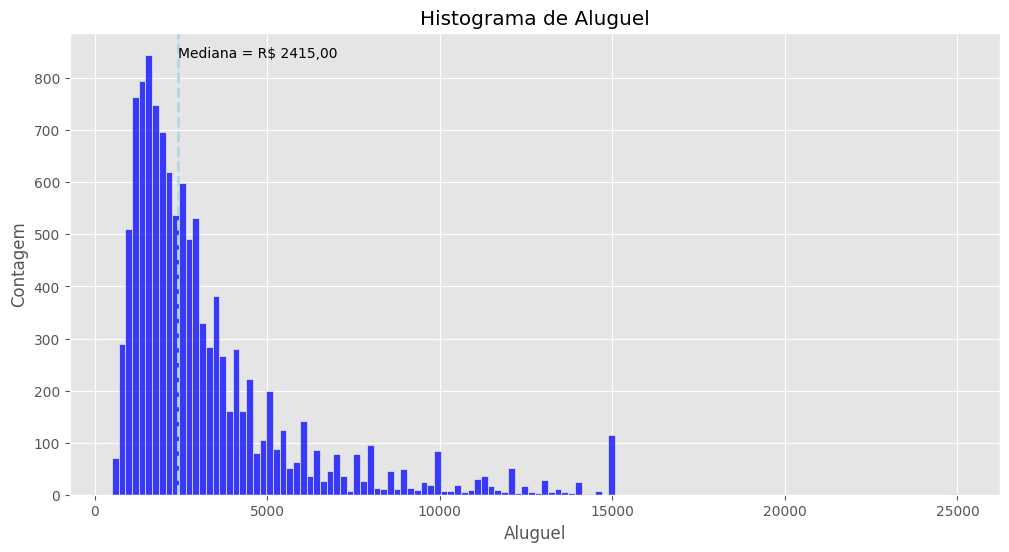

In [19]:
mediana_aluguel = housing.rent.median()
text_hist = (f'R$ {mediana_aluguel:.2f}'.replace(',', 'virgula').replace('.', ',').replace('virgula', '.'))

# plotando o grafico
fig, axes = plt.subplots(1,1, figsize=(12, 6))

_ = sns.histplot(housing.rent, color='blue')
_ = plt.axvline(mediana_aluguel, color='lightblue', linestyle='dashed', linewidth=2)
_ = plt.title('Histograma de Aluguel')
_ = plt.xlabel('Aluguel')
_ = plt.ylabel('Contagem')
_ = plt.text(x=housing.rent.median(), y=840, s=f'Mediana = {text_hist}', fontsize=10) # Colocando o texto indicando o valor da mediana
_ = plt.show()

In [20]:
housing[['rent', 'total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


Analisando a diferença entre o custo total e o aluguel em si

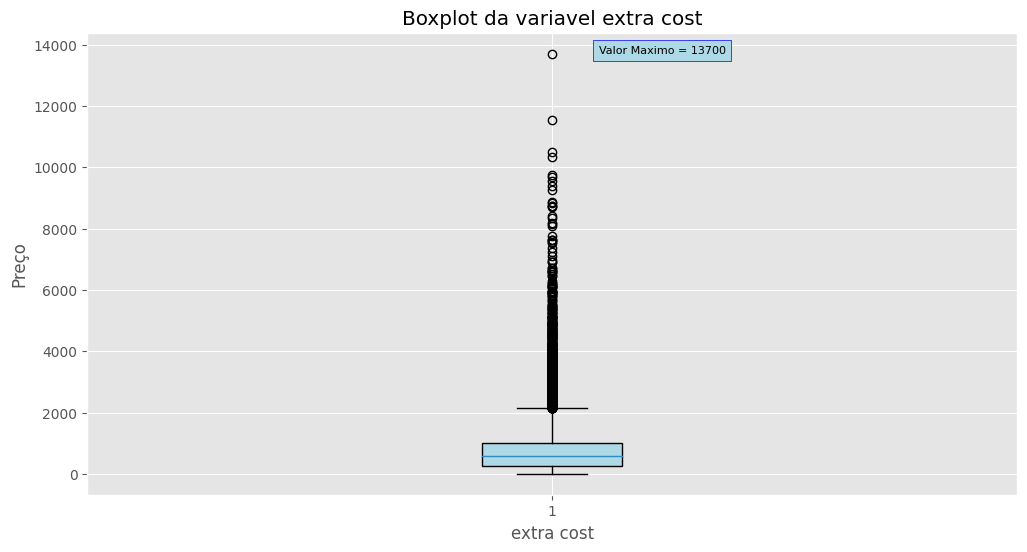

In [21]:
housing['extra_cost'] =  housing['total'] - housing['rent']

fig, ax = plt.subplots(1,1, figsize=(12, 6))

bp1 = ax.boxplot(housing['extra_cost'], patch_artist=True)
ax.set_title('Boxplot da variavel extra cost')
ax.set_xlabel('extra cost')
ax.set_ylabel('Preço')

# Definindo a cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

# Adicionando texto no valor maximo
max_cost = np.max(housing['extra_cost']) # É a altura do boxplot
ax.annotate(f'Valor Maximo = {max_cost}', # Texto
               xy=(1, max_cost), # Posição da seta
               xytext=(1.05, max_cost),# Posição do texto
               bbox=dict(facecolor='lightblue', edgecolor='blue'), # Coloração
               fontsize=8)

plt.show()

A maior parte dos registros possui um valor baixo de taxa extra, porem existem muitos fortes outliers, que podem puxar a media pra cima, vamos analisar abaixo:

In [22]:
housing[['extra_cost']].describe().T

,count,mean,std,min,25%,50%,75%,max
extra_cost,11657.0,829.215836,938.912775,9.0,268.0,577.0,1016.0,13700.0


Como dito anteriormente, a media é maior que a mediana por conta dos outliers

Vamos analisar a distribuição dos tipos de imoveis

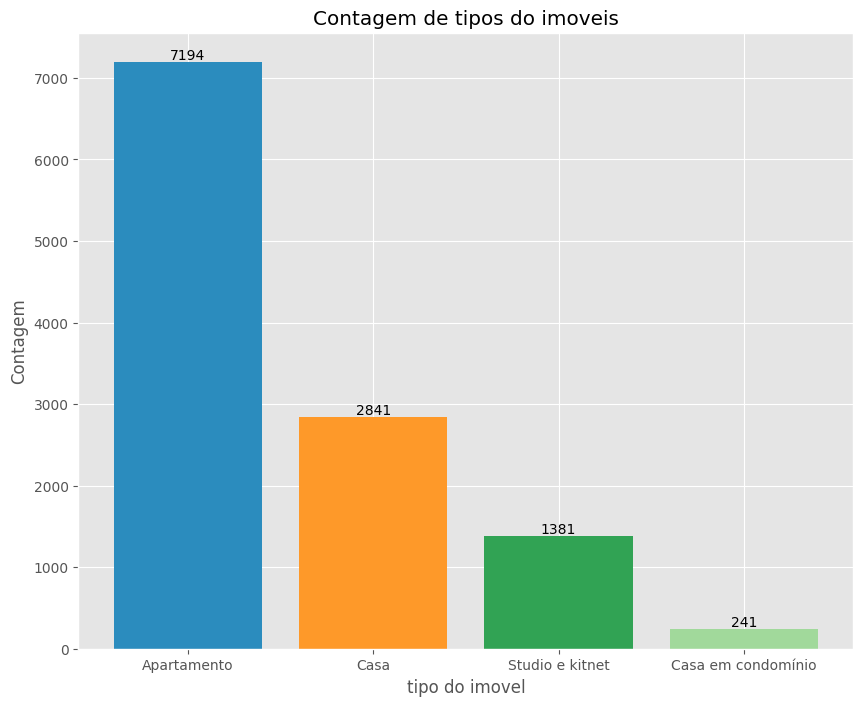

In [23]:
# fig = px.histogram(housing, x='type')

# fig.update_layout(title='Distribuição dos tipos dos imoveis',
#                   xaxis_title = 'Tipo de imovel',
#                   yaxis_title='Contagem')
# #fig.show()

type_count = housing['type'].value_counts()
colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

# Plotando o grafico
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(type_count.index, type_count.values, color=colors)
ax.set_xlabel('tipo do imovel')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de tipos do imoveis')

# Adiconando o texto: Numero escrito da quantidade pro regiao
for index, value in enumerate(type_count.values):
    # Vamos colocar na posição (index, valor) uma vez que ele vai ter que ficar horizontalmente na sua categoria, e na altura do valor, uma vez que a altura da barra é o proprio valor
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Sera que o extra cost se relaciona com o tipo do imovel? Como sera a distribução do preço do aluguel para cada tipo de imovel?

Vamos analisar numero de quartos e vagas na garagem

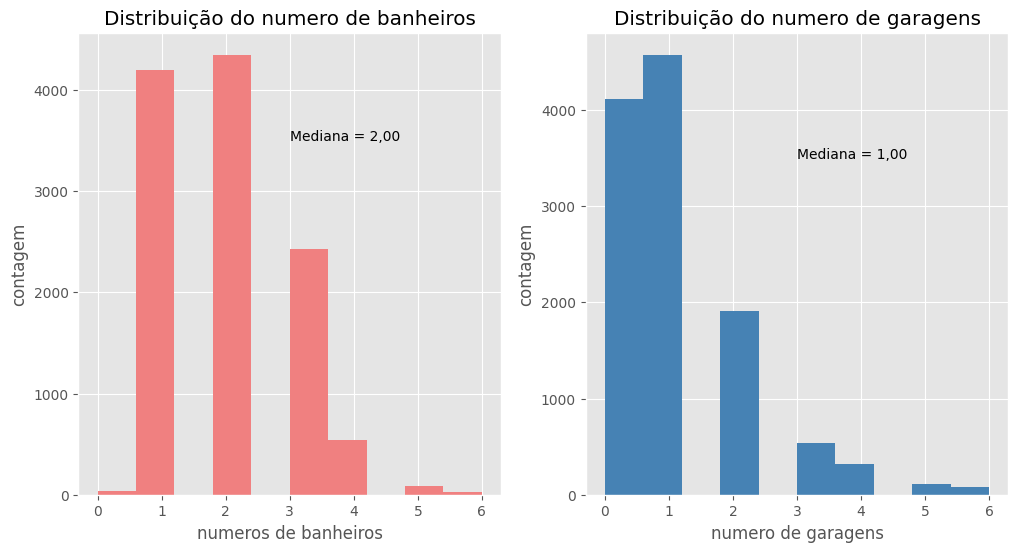

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))


axes[0].hist(housing['bedrooms'], color='lightcoral')
axes[0].set_title('Distribuição do numero de banheiros')
axes[0].set_xlabel('numeros de banheiros')
axes[0].set_ylabel('contagem')

# Colocando texto
text_hist = (f'{housing.bedrooms.median():.2f}'.replace(',', 'virgula').replace('.', ',').replace('virgula', '.'))
axes[0].text(x=3, y=3500, s=f'Mediana = {text_hist}', fontsize=10) # Colocando o texto indicando o valor da mediana

# Plotando o grafico da garagem
axes[1].hist(housing['garage'], color='steelblue')
axes[1].set_title('Distribuição do numero de garagens')
axes[1].set_xlabel('numero de garagens')
axes[1].set_ylabel('contagem')

# Colocando texto
text_hist = (f'{housing.garage.median():.2f}'.replace(',', 'virgula').replace('.', ',').replace('virgula', '.'))
axes[1].text(x=3, y=3500, s=f'Mediana = {text_hist}', fontsize=10) # Colocando o texto indicando o valor da mediana

plt.show()

Analisando a area dos imoveis

In [25]:
from tabulate import tabulate

desc = housing["area"].describe()
desc["var"] = housing["area"].var()
desc["kurt"] = housing["area"].kurtosis()
desc = pd.DataFrame(desc)
print(tabulate(desc, headers="keys", tablefmt="psql", showindex=True))

+-------+------------+
|       |       area |
|-------+------------|
| count | 11657      |
| mean  |    84.6557 |
| std   |    74.0205 |
| min   |     0      |
| 25%   |    40      |
| 50%   |    60      |
| 75%   |    96      |
| max   |   580      |
| var   |  5479.04   |
| kurt  |     8.3946 |
+-------+------------+


Com essa analise, podemos ver que a media de metro quadrado dos aptos em SP é por volta de 84, porem a partir da analise do desvio padrão, que tem um valor de 74, podemos ver que os dados tem uma grande variação, podemos confirmar isso quando percebemos que a mdiana é 60, um valor dignificativamente menor que da media, ou seja, a partir dessas duas informações podemos perceber a presença de fortes outliers que puxam a media pra cima.

Tambem podemos perceber que os dados não estão completamente corretos, uma vez que temos apartamentos com 0 M2, o que é impossivel

Vamos verificar os apartamentos com menos de 10M2 para analisar a incoerencia dos dados

In [26]:
housing.query('area < 10')

,address,district,area,bedrooms,garage,type,rent,total,extra_cost
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987,497
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594,24
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569,969
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711,211
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351,151
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420,2920
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641,11


Temos 7 apartamentos com area menor que 10

Vamos analisar quais são os bairros com mais aparições

In [27]:
print(f'Temos {housing["district"].nunique()} no dataset')

Temos 1199 no dataset


Quais são os 10 bairros com mais aparições

In [28]:
# O size é basicamente um count() so que excluindo todas as outras colunas, ou seja, so deixa o baiirro e a coluna de contagem
bairros_count = housing.groupby("district").size().sort_values(ascending=False).reset_index(name='Contagem')[:10]
bairros_count

,district,Contagem
0,Bela Vista,352
1,Vila Mariana,232
2,Jardim Paulista,220
3,Centro,178
4,Pinheiros,159
5,Consolação,157
6,Santana,152
7,Mooca,147
8,Santo Amaro,146
9,Brás,141


## Analise Multivariadas

In [29]:
housing.head()

,address,district,area,bedrooms,garage,type,rent,total,extra_cost
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,315
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,204
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,654


Quais são os bairros de risco? ou seja, os bairros com casas com valores mais altos

In [30]:
aluguel_per_bairro = housing.groupby('district')['rent'].mean().sort_values(ascending=False).reset_index()

aluguel_per_bairro.columns = ['Distrito', 'Media de Aluguel']

aluguel_per_bairro.head()

,Distrito,Media de Aluguel
0,Jardim Tango,15000.0
1,Alphaville Residencial Dois,15000.0
2,Alphaville Residencial Plus,15000.0
3,Residencial Cinco (alphaville),13600.0
4,Alphaville Residencial Um,13500.0


In [31]:
housing[housing['district'] == 'Alphaville Residencial Plus']

,address,district,area,bedrooms,garage,type,rent,total,extra_cost
11539,Alameda Mar Mediterrâneo,Alphaville Residencial Plus,420,4,4,Casa,15000,20270,5270


Os tres bairros mais caros tem apenas 1 registro e tem dois registros do alphaville separados, então não é possivel ver com clareza como realmente é a distribuiçao do aluguel em media

Primeiramente vamos reescrever todos os registros que tenham "alphaville" no nome pra ser apenas alphaville, pra podermos analisar todos os registros como um bairro unico

In [32]:
housing['district'] = housing['district'].str.lower().replace(to_replace='.*alphaville.*', value='Alphaville', regex=True)
housing['district'] = housing['district'].str.lower().replace(to_replace='.*morumbi.*', value='morumbi', regex=True)

Vamos fazer a mesma consulta mas filtrando os bairros que tiverem pelo menos 5 registros e juntando os nomes de alphaville

In [33]:
aluguel_top_bairro = housing.groupby('district').agg({'rent': ['mean', 'count']}).reset_index()

aluguel_top_bairro.columns = ['Distrito', 'Media de Aluguel', 'Contagem de Registros']
aluguel_top_bairro = aluguel_top_bairro.sort_values(by='Media de Aluguel', ascending=False)

aluguel_top_bairro[aluguel_top_bairro['Contagem de Registros'] >= 5].head()

,Distrito,Media de Aluguel,Contagem de Registros
561,pacaembu,12054.000000,5
76,chácara monte alegre,10205.000000,8
7,alto de pinheiros,8617.000000,20
188,jardim anália franco,7889.090909,11
3,alphaville,7731.946809,94


Analisando o preço do aluguel dos 50 bairros mais caros

In [34]:
aluguel_top_bairro[:50].describe()

,Media de Aluguel,Contagem de Registros
count,50.000000,50.000000
mean,8525.720176,17.440000
std,2050.559810,40.394564
min,6246.766234,1.000000
25%,6959.507353,1.000000
50%,7765.973404,3.000000
75%,9631.875000,7.500000
max,15000.000000,220.000000


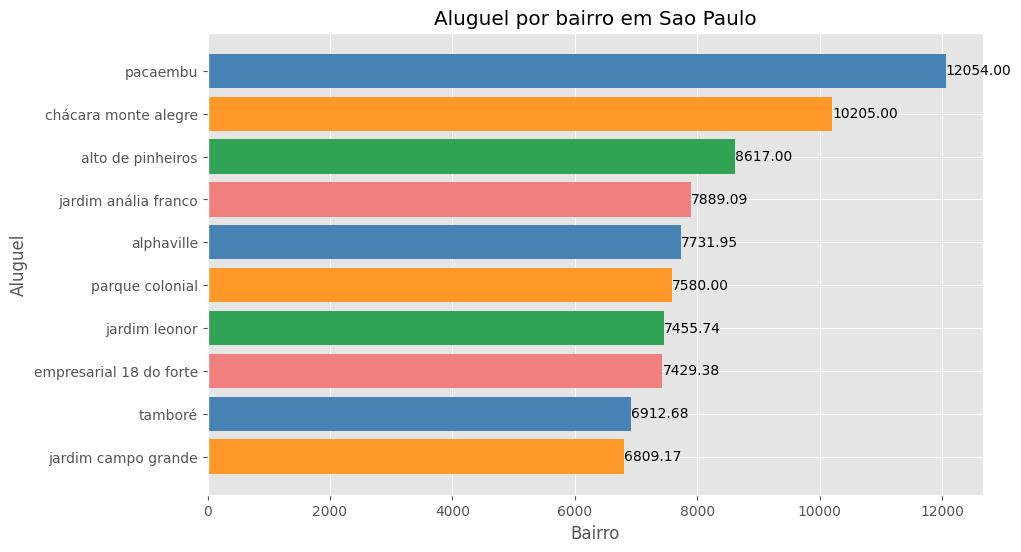

In [35]:
colors = ['steelblue', '#fe9929', '#31a354', 'lightcoral']

# Filtrando pra deixar apenas os bairros com mais de 5 registros e apenas os 10 mais caros
top_10_rent = aluguel_top_bairro[aluguel_top_bairro['Contagem de Registros'] >= 5][:10]
# Plotando o grafico
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_10_rent.Distrito, top_10_rent['Media de Aluguel'], color=colors)
ax.set_xlabel('Bairro')
ax.set_ylabel('Aluguel')
ax.set_title('Aluguel por bairro em Sao Paulo')
ax.invert_yaxis() # Invertendo o eixo 

# Adiconando o texto: Numero escrito da quantidade pro regiao
for index, row in top_10_rent.iterrows():
    ax.text(row['Media de Aluguel'], row['Distrito'], f'{row["Media de Aluguel"]:.2f}', ha='left', va='center')

plt.show()

Vamos entender também os bairros mais baratos de sao paulo

In [36]:
aluguel_bot_bairro = housing.groupby('district').agg({'rent': ['mean', 'count']}).reset_index()

aluguel_bot_bairro.columns = ['Distrito', 'Media de Aluguel', 'Contagem de Registros']
aluguel_bot_bairro = aluguel_bot_bairro.sort_values(by='Media de Aluguel', ascending=True)

aluguel_bot_bairro[aluguel_bot_bairro['Contagem de Registros'] >= 5].head()
colors = ['steelblue', '#fe9929', '#31a354', 'lightcoral']

aluguel_bot_bairro[:50].describe()

,Media de Aluguel,Contagem de Registros
count,50.000000,50.000000
mean,838.520000,1.500000
std,103.614718,0.994885
min,500.000000,1.000000
25%,800.000000,1.000000
50%,870.000000,1.000000
75%,906.000000,2.000000
max,950.000000,6.000000


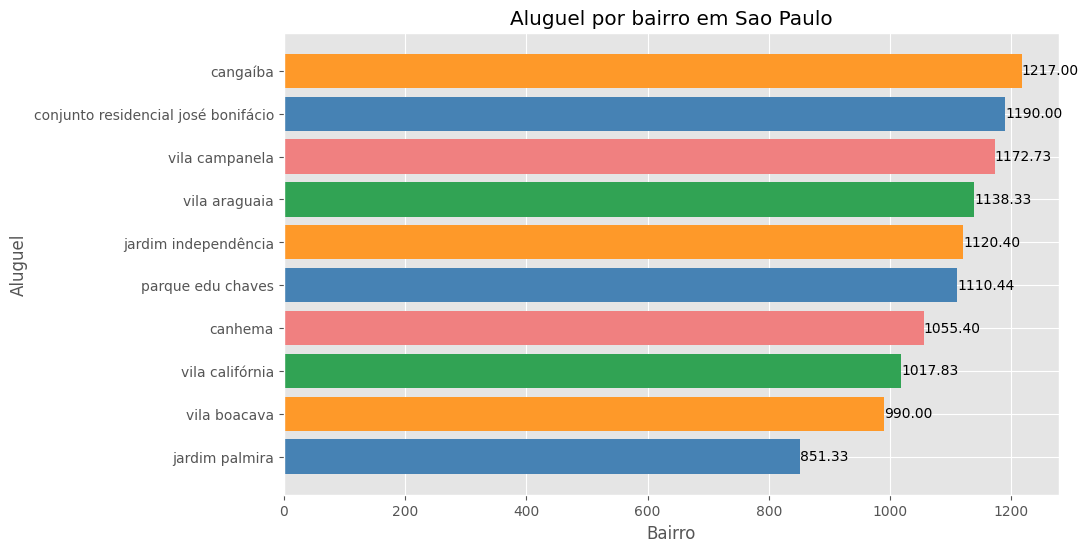

In [37]:
# Filtrando pra deixar apenas os bairros com mais de 5 registros e apenas os 10 mais caros
bot_10_rent = aluguel_bot_bairro[aluguel_bot_bairro['Contagem de Registros'] >= 5][:10]
# Plotando o grafico
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(bot_10_rent.Distrito, bot_10_rent['Media de Aluguel'], color=colors)
ax.set_xlabel('Bairro')
ax.set_ylabel('Aluguel')
ax.set_title('Aluguel por bairro em Sao Paulo')

# Adiconando o texto: Numero escrito da quantidade pro regiao
for index, row in bot_10_rent.iterrows():
    ax.text(row['Media de Aluguel'], row['Distrito'], f'{row["Media de Aluguel"]:.2f}', ha='left', va='center')

plt.show()

Vamos analisar mais de perto a diferença da distribuição entre os 50 bairros mais caros e 50 bairros mais baratoa de sao paulo

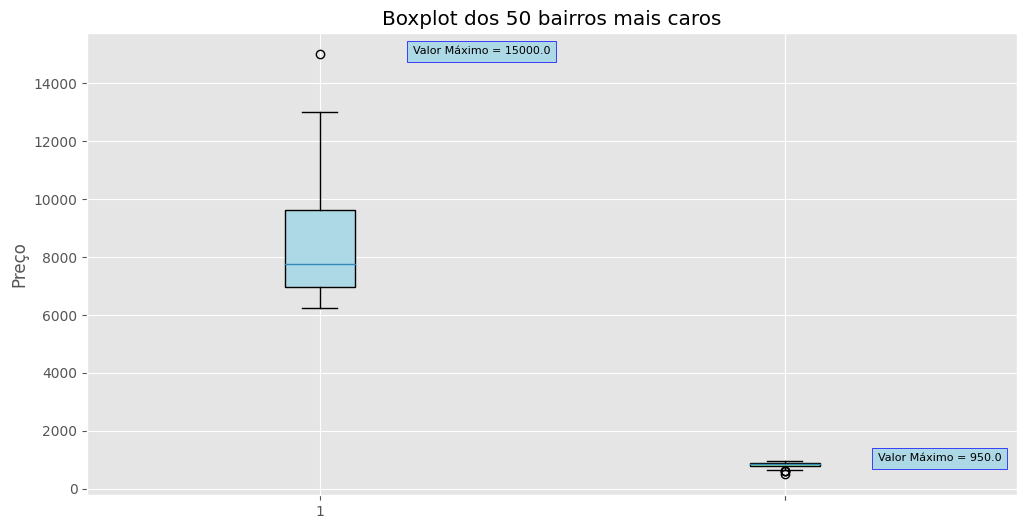

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['steelblue', 'lightcoral']

# Boxplot dos 50 bairros mais caros
bp1 = ax.boxplot(aluguel_top_bairro['Media de Aluguel'][:50], positions=[0], patch_artist=True)
ax.set_title('Boxplot dos 50 bairros mais caros')
ax.set_xticks([0, 1])  # Posições dos ticks no eixo x
ax.set_xticklabels(['Aluguel', 'Aluguel + Taxas'])
ax.set_ylabel('Preço')

# Definindo a cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

# Adicionando texto no valor máximo
max_rent = np.max(aluguel_top_bairro['Media de Aluguel'][:50])
ax.annotate(f'Valor Máximo = {max_rent}', xy=(0, max_rent), xytext=(0.2, max_rent),
            bbox=dict(facecolor='lightblue', edgecolor='blue'), fontsize=8)

# Boxplot dos 50 bairros mais baratos de são paulo
bp2 = ax.boxplot(aluguel_bot_bairro['Media de Aluguel'][:50], positions=[1], patch_artist=True)

# Definindo a cor do boxplot
bp2['boxes'][0].set_facecolor('lightgreen')

# Adicionando texto no valor máximo
max_total = np.max(aluguel_bot_bairro['Media de Aluguel'][:50])
ax.annotate(f'Valor Máximo = {max_total}', xy=(1, max_total), xytext=(1.2, max_total),
            bbox=dict(facecolor='lightblue', edgecolor='blue'), fontsize=8)

plt.show()

Vamos analisar com mais informações as diferenças entre os 10 bairros mais caros e os 10bairros mais baratos

In [39]:
# Primeiramente temos que filtrar o df original para ter apenas os bairros que estão entre o top 10 mais caros, pegando informações deles
infos_top_bairros = housing[housing['district'].isin(top_10_rent['Distrito'])]
infos_bot_bairros = housing[housing['district'].isin(bot_10_rent['Distrito'])]

# Agora que ja temos um df com as informações dos bairros mais caros e outro com as infos dos mais baratos, vamos fazer um agregamento em cada um para pegar a media do aluguel por tipo do imovel
aluguel_top_bairro_tipo = infos_top_bairros.groupby('type')['rent'].mean().reset_index()
aluguel_bot_bairro_tipo = infos_bot_bairros.groupby('type')['rent'].mean().reset_index()

# ploranto o grafico
fig = go.Figure()

fig.add_trace(go.Bar(
    x=aluguel_top_bairro_tipo["type"],
    y=aluguel_top_bairro_tipo["rent"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=aluguel_bot_bairro_tipo["type"],
    y=aluguel_bot_bairro_tipo["rent"],
    name="Bottom Aptos"
))


fig.show()


É interessante perceber que em casas, o preço entre os bairros nobres e pobres são extremamente diferentes, o que acontece de uma forma mais amena com apartamento e principalmente em kitnets, mostrando que aparentemente o tipo do imovel pode limitar a diferença de preço entres os bairros, chegando a conclusão que possivelmente os clientes não estão dispostos a pagar muito mais por uma kitnet a depender do bairro, enquanto nos outros tipos de imoveis acontece o contrario, com os bairros nobres tendo uma difereça absurda comparativamente com os pobres

Vamos analisar se o tipo do imovel influencia na diferençade area entre os apartamentos em bairros ricos e pobres

In [40]:
# Primeiramente temos que filtrar o df original para ter apenas os bairros que estão entre o top 10 mais caros, pegando informações deles
infos_top_bairros = housing[housing['district'].isin(top_10_rent['Distrito'])]
infos_bot_bairros = housing[housing['district'].isin(bot_10_rent['Distrito'])]

# Agora que ja temos um df com as informações dos bairros mais caros e outro com as infos dos mais baratos, vamos fazer um agregamento em cada um para pegar a media do aluguel por tipo do imovel
aluguel_top_bairro_tipo = infos_top_bairros.groupby('type')['area'].mean().reset_index()
aluguel_bot_bairro_tipo = infos_bot_bairros.groupby('type')['area'].mean().reset_index()

# ploranto o grafico
fig = go.Figure()

fig.add_trace(go.Bar(
    x=aluguel_top_bairro_tipo["type"],
    y=aluguel_top_bairro_tipo["area"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=aluguel_bot_bairro_tipo["type"],
    y=aluguel_bot_bairro_tipo["area"],
    name="Bottom Aptos"
))


fig.show()


De forma similar a ultima analise, o tamanho do imovel das casas tem a tendencia de ser bem maior em bairros nobres comparativamente com os sobres, o que nao acontece em kitnet, independente de ser em bairro nobre ou pobre a tendencia é a kitnet ter um tamanho pequeno, distoando pouco entre os bairros, o mesmo acontece nos apartamentos, apesar de em uma menor proporção.

Essa diferença maior entre as casas pode explicar a grande diferença entre o preço das casas entre bairros nobres o pobres, o mesmo para kitnet, os preços possivelmente não distoam tanto por conta da menor diferença entre o tamanho

Vamos analisar agora a diferença de outras caracteristicas entre bairros nobres e pobres, separados por tipo do imovel

In [42]:
housing.head(1)

,address,district,area,bedrooms,garage,type,rent,total,extra_cost
0,Rua Herval,belenzinho,21,1,0,Studio e kitnet,2400,2939,539


In [44]:
# Primeiramente temos que filtrar o df original para ter apenas os bairros que estão entre o top 10 mais caros, pegando informações deles
infos_top_bairros = housing[housing['district'].isin(top_10_rent['Distrito'])]
infos_bot_bairros = housing[housing['district'].isin(bot_10_rent['Distrito'])]

# Vamos descobrir quantos registros tem para cada numero de quartos
top_aptos_bedrooms = infos_top_bairros["bedrooms"].value_counts().reset_index()
top_aptos_bedrooms.columns = ["Nº de Quartos", "Quantidade"]
top_aptos_bedrooms = top_aptos_bedrooms.sort_values(by="Nº de Quartos", ascending=True)

bottom_aptos_bedrooms = infos_bot_bairros["bedrooms"].value_counts().reset_index()
bottom_aptos_bedrooms.columns = ["Nº de Quartos", "Quantidade"]
bottom_aptos_bedrooms = bottom_aptos_bedrooms.sort_values(by="Nº de Quartos", ascending=True)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_aptos_bedrooms["Nº de Quartos"],
    y=top_aptos_bedrooms["Quantidade"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=bottom_aptos_bedrooms["Nº de Quartos"],
    y=bottom_aptos_bedrooms["Quantidade"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por Nº de Quartos",
    xaxis_title="Nº de Quartos",
    yaxis_title="Quantidade"
)

fig.show()

In [45]:
# Primeiramente temos que filtrar o df original para ter apenas os bairros que estão entre o top 10 mais caros, pegando informações deles
infos_top_bairros = housing[housing['district'].isin(top_10_rent['Distrito'])]
infos_bot_bairros = housing[housing['district'].isin(bot_10_rent['Distrito'])]

# Vamos descobrir quantos registros tem para cada numero de quartos
top_aptos_bedrooms = infos_top_bairros["garage"].value_counts().reset_index()
top_aptos_bedrooms.columns = ["Nº de Quartos", "Quantidade"]
top_aptos_bedrooms = top_aptos_bedrooms.sort_values(by="Nº de Quartos", ascending=True)

bottom_aptos_bedrooms = infos_bot_bairros["garage"].value_counts().reset_index()
bottom_aptos_bedrooms.columns = ["Nº de Quartos", "Quantidade"]
bottom_aptos_bedrooms = bottom_aptos_bedrooms.sort_values(by="Nº de Quartos", ascending=True)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_aptos_bedrooms["Nº de Quartos"],
    y=top_aptos_bedrooms["Quantidade"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=bottom_aptos_bedrooms["Nº de Quartos"],
    y=bottom_aptos_bedrooms["Quantidade"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por Nº de Quartos",
    xaxis_title="Nº de Quartos",
    yaxis_title="Quantidade"
)

fig.show()

De forma similar nos dois graficos, podemos ver que nos imoveis mais caros, temos um maior numero tanto de quartos quanto em garagens, sendo a maioria deles com 3 quartso e 2 garagens, enquanto em imoveis em bairros pobres, tem uma maior quantidade de registros com o minimo possivel, ou seja, um quarto e sem garagem, mostrando a diferença entre os imoveis dos bairros mais baratos e mais caros

Agora vamos fazer uma analise de correlação entre as features numericas

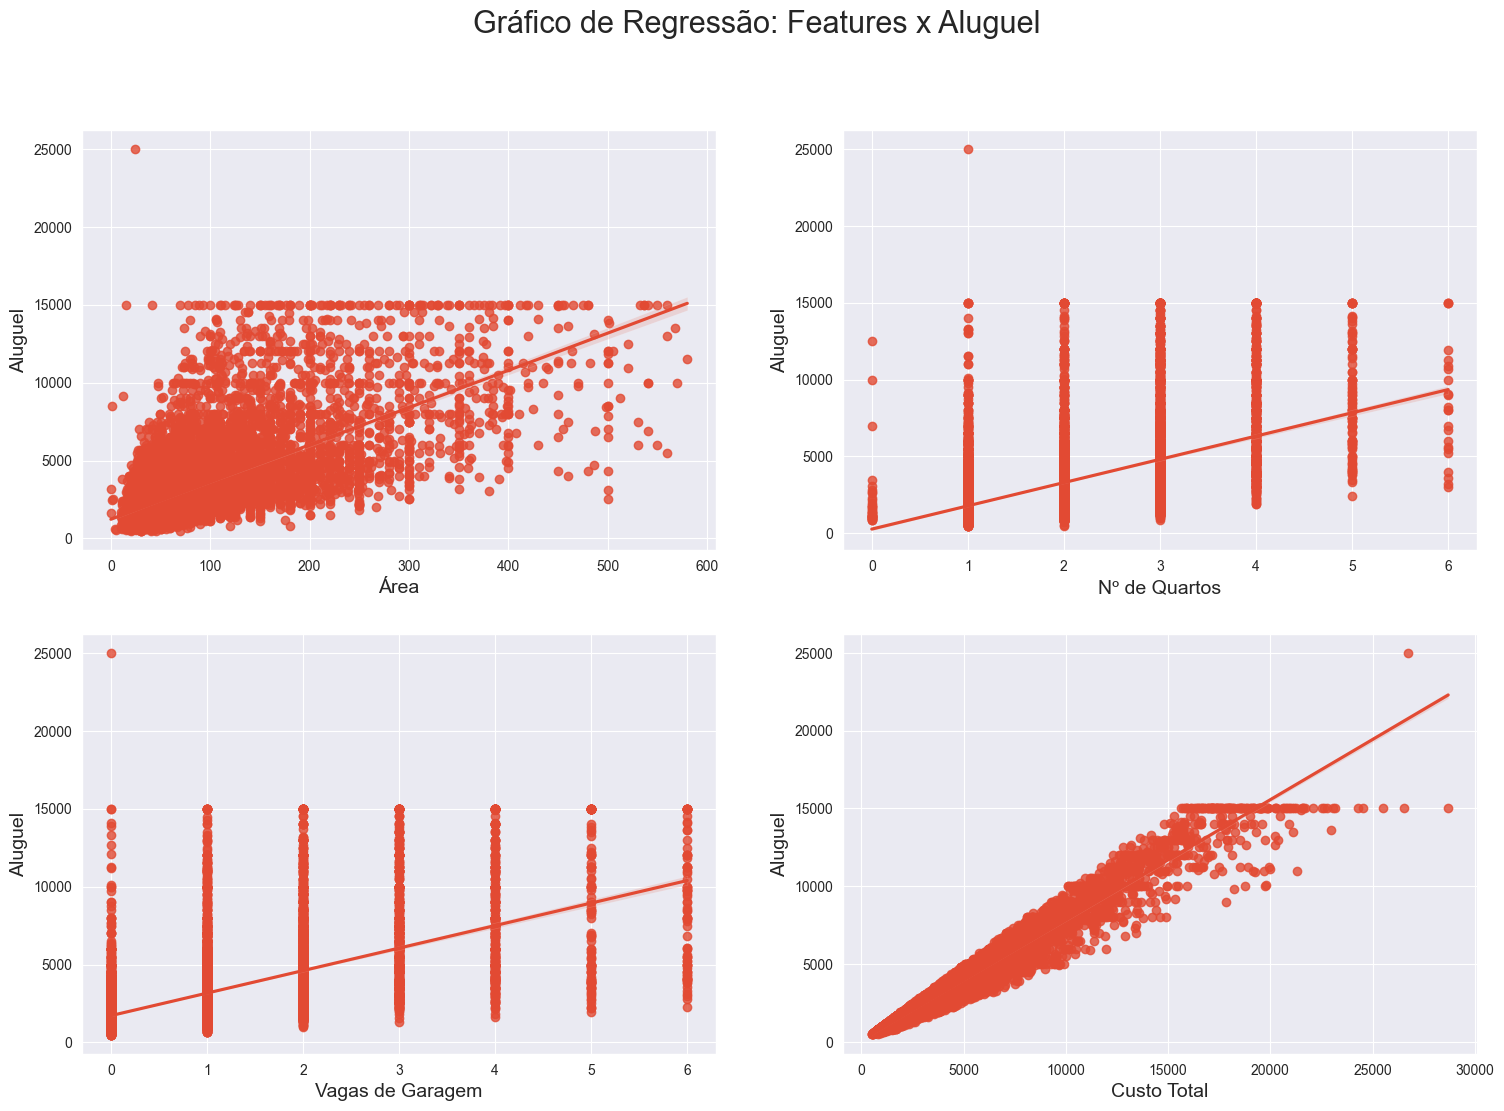

In [46]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

_ = sns.regplot(x="area", y="rent", data=housing, ax=axs[0, 0])
_ = sns.regplot(x="bedrooms", y="rent", data=housing, ax=axs[0, 1])
_ = sns.regplot(x="garage", y="rent", data=housing, ax=axs[1, 0])
_ = sns.regplot(x="total", y="rent", data=housing, ax=axs[1, 1])

_ = axs[0, 0].set_xlabel("Área", fontsize=14)
_ = axs[0, 0].set_ylabel("Aluguel", fontsize=14)
_ = axs[0, 1].set_xlabel("Nº de Quartos", fontsize=14)
_ = axs[0, 1].set_ylabel("Aluguel", fontsize=14)
_ = axs[1, 0].set_xlabel("Vagas de Garagem", fontsize=14)
_ = axs[1, 0].set_ylabel("Aluguel", fontsize=14)
_ = axs[1, 1].set_xlabel("Custo Total", fontsize=14)
_ = axs[1, 1].set_ylabel("Aluguel", fontsize=14)

_ = fig.suptitle("Gráfico de Regressão: Features x Aluguel", fontsize=22)

_ = plt.show()

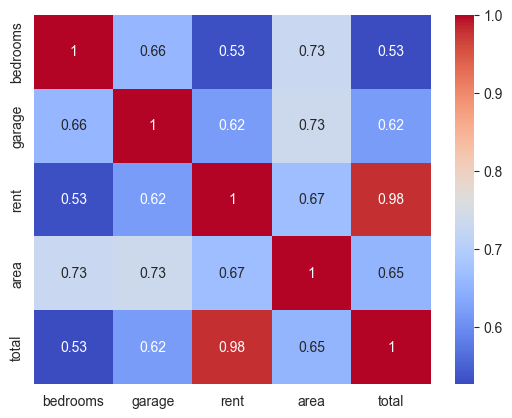

In [48]:
subset_aptos = housing[['bedrooms', 'garage', 'rent', 'area', 'total']]

correlation_matrix = subset_aptos.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


parece existir uma forte relação entre area, aluguel, garagem e quartos. Mostrando assim que o grafico de dispersão escondeu algumas correlações importantes

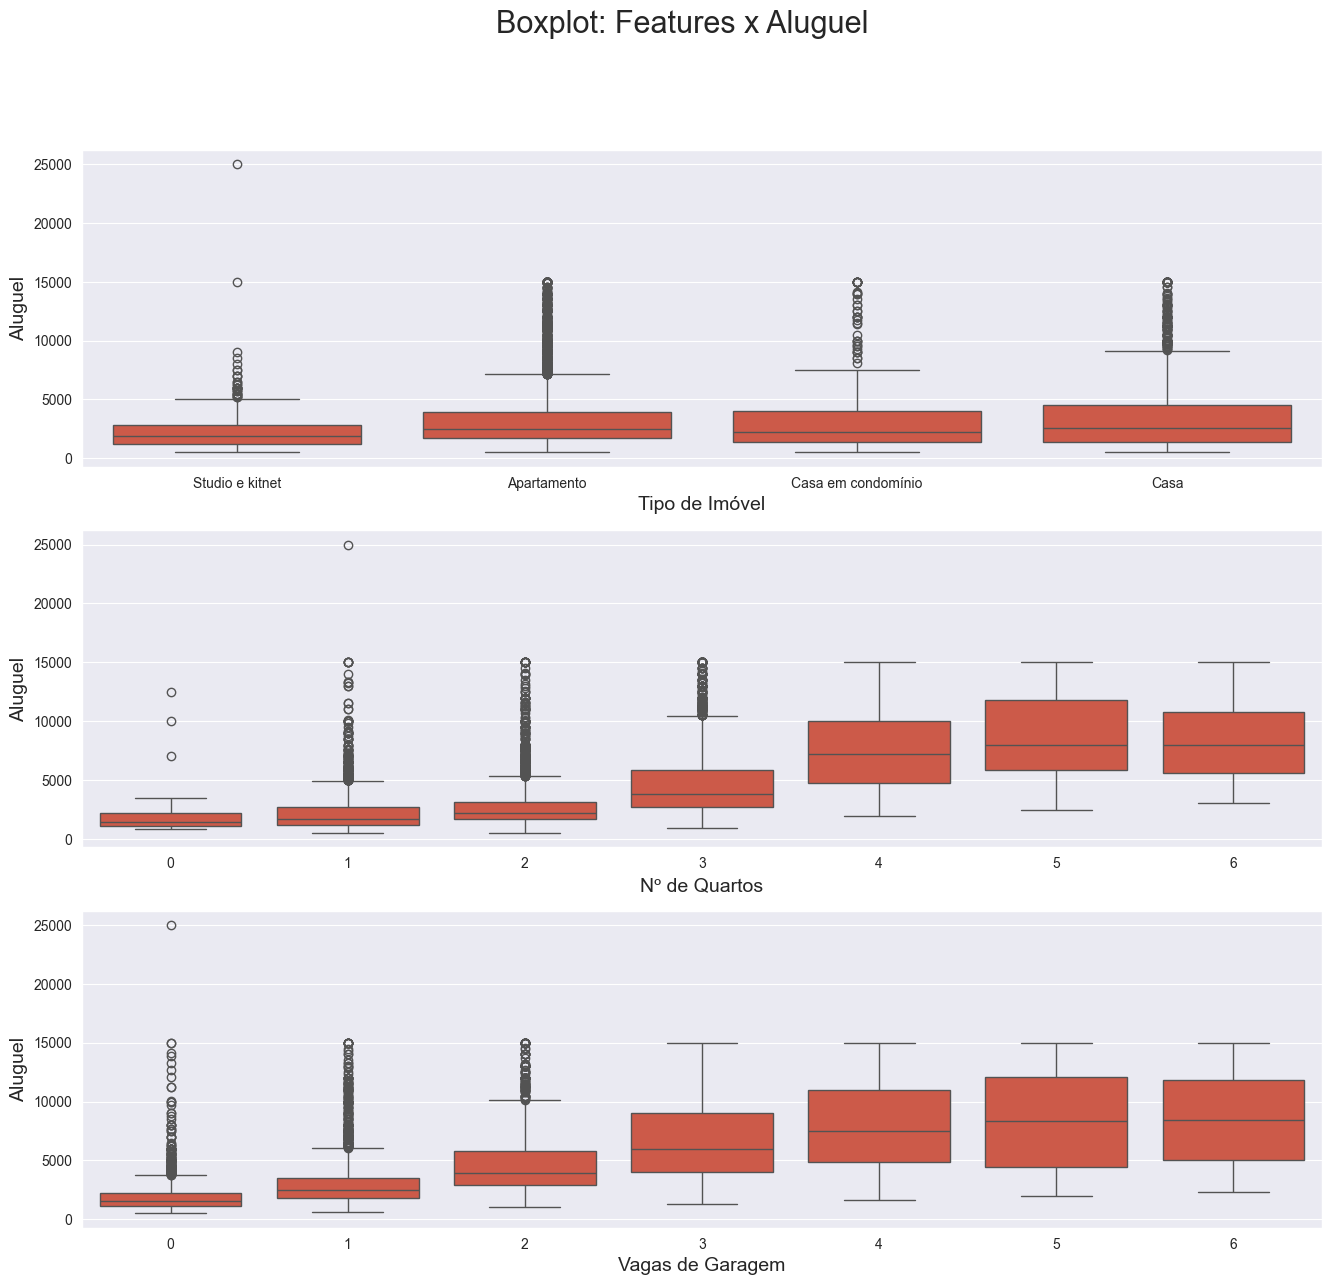

In [49]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(3, 1, figsize=(16, 14))

_ = sns.boxplot(x="type", y="rent", data=housing, ax=axs[0])
_ = sns.boxplot(x="bedrooms", y="rent", data=housing, ax=axs[1])
_ = sns.boxplot(x="garage", y="rent", data=housing, ax=axs[2])

_ = axs[0].set_xlabel("Tipo de Imóvel", fontsize=14)
_ = axs[0].set_ylabel("Aluguel", fontsize=14)
_ = axs[1].set_xlabel("Nº de Quartos", fontsize=14)
_ = axs[1].set_ylabel("Aluguel", fontsize=14)
_ = axs[2].set_xlabel("Vagas de Garagem", fontsize=14)
_ = axs[2].set_ylabel("Aluguel", fontsize=14)

_ = fig.suptitle("Boxplot: Features x Aluguel", fontsize=22)

_ = plt.show()